# KING COUNTY REAL ESTATE 

## An analysis of the Housing Market in the King County Region

#### Importation of Libraries

In [89]:
# Data Manipulation
import pandas as pd 
import numpy as np 

# Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modelling and Evaluations
import scipy.stats as stat 
from statsmodels.formula.api import ols 
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Business Understanding

### Background information
King County, Washington, is a diversified area encompassing urban, suburban, and rural areas. The housing market is fiercely competitive, fueled by substantial demand from homebuyers and investors. The county provides a variety of housing alternatives, including single-family houses, condominiums, townhouses, apartments, and luxurious estates. The county is home to exceptional schools and educational organizations, including the University of Washington.

The county's robust transportation system effects home demand and pricing. Hiking, skiing, boating, and fishing are all outdoor recreational activities. King County homes provide a desirable balance of natural beauty, economic prospects, and quality of life amenities, making them a popular choice for both homeowners and investors. However, successfully navigating the housing market involves careful study, planning, and consideration of individual requirements and preferences.

### Overview
The project analyses home prices and market trends using the King County House Sales dataset. It employs data analytics and predictive modelling to identify improvements that yield the maximum return on investment. The key purpose therefore, is to develop an advice system for a real estate agency in King County, Washington, that will assist homeowners in understanding how home modifications effect the projected value of their property.

### Business Problem
The goal is to deliver insights to the real estate agency on how to improve return on investment by predicting the price of estates by homeowners based on specific factors. Some of the key objectives include:

Examining which renovation factors have the biggest effects on raising a home's assessed value, i.e. 

    a. how much will the sale price likely increase by adding floors? 
    b. how much will the sale price likely increase by adding bedrooms? 
    c. what is the expected rise in the selling price of a house that has an addition to its living area?

Nevertheless, there are additional goals as well: developing a predictive model that projects a home's market value growth depending on renovation elements; and tracking trends in the real estate market.

### Objectives:

To determine Current Market Trends and Best-Performing Features:

    a. What factors distinguish top-performing properties in terms of sale price?
    b. Which variables (e.g bedrooms and floors) of the residences raise sale prices?

To Investigate Popular Features and Preferences Across Time:

    a. Which housing features and attributes have proven most popular and successful throughout time?
    b. What types of home features appeal to potential buyers?

To Investigate How Home Renovations affect Sale Price: 

    a. How does adding floors affect the sale price of a home?
    b. How does the addition of bedrooms affect the sale price of a home?
    c. What is the predicted rise in the selling price of a home after an addition to its living space?

To Inspect Seasonal Trends & Optimal Time to Sell: 

    a. Do home sales and prices follow seasonal patterns?
    b. When is the greatest time to sell a home for the highest possible price?

# Data Understanding
In order to predict the sales price of properties in King County, the research extracts data from the King County House Sales dataset, which includes the kc_house_data.csv file.

It includes 20 homes, 21,597 housing observations, and a column containing the home ID. Homes sold between May 2014 and May 2015 are included in the data. The following are a few pertinent columns to be used in this analysis: price - the amount at which the property was previously sold, bedrooms - the number of bedrooms, bathrooms - the number of bathrooms, sqft_living - the square footage of the home's living area, sqft_lot - the square footage of the lot, floors - the total number of levels in the house, and grade - the overall grade of the property. Concerning the building and layout of the house as well as the year the house was built (yr_built)

### Variables
The aim variable in this project is the "price" of the properties. This suggests that the result or objective variable is predicted or explained by other independent factors, such as the property's characteristics (square footage, number of bedrooms, location, etc.). In statistical modelling and analysis, the variable being modelled or projected based on the values of other variables is the price of a property. These variables will be utilized to provide answers to the data inquiries and provide the real estate firm with useful information on how to forecast prices based on characteristics that influence sales. Additional variables consist of bedrooms, square footage, flooring, grade, year of construction, year of renovation, and sale date. More information on the variables is given at the end of the document.

### Loading the data

In [90]:
kc_data_df = pd.read_csv('data/kc_house_data.csv') # reading our data into a pandas data frame
kc_data_df.head() # checking the first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Lets explore our data

In [91]:
kc_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Understanding the Features in our data

- `id`: An integer representing some unique identifier.
- `date`: An object (likely a string) representing dates.
- `price`: A floating-point number representing the price of a property.
- `bedrooms`: An integer representing the number of bedrooms in a property.
- `bathrooms`: A floating-point number representing the number of bathrooms in a property.
- `sqft_living`: An integer representing the square footage of living space in a property.
- `sqft_lot`: An integer representing the square footage of the lot on which the property sits.
- `floors`: A floating-point number representing the number of floors in the property.
- `waterfront`: An object (likely a string) indicating whether the property has a waterfront view.
- `view`: An object (likely a string) representing the level of view from the property.
- `condition`: An object (likely a string) representing the condition of the property.
- `grade`: An object (likely a string) representing the grade given to the property.
- `sqft_above`: An integer representing the square footage of the property apart from the basement.
- `sqft_basement`: An object (likely a string) representing the square footage of the basement.
- `yr_built`: An integer representing the year the property was built.
- `yr_renovated`: A floating-point number representing the year the property was renovated.
- `zipcode`: An integer representing the zipcode of the property location.
- `lat`: A floating-point number representing the latitude of the property location.
- `long`: A floating-point number representing the longitude of the property location.
- `sqft_living15`: An integer representing the square footage of interior housing living space for the nearest 15 neighbors.
- `sqft_lot15`: An integer representing the square footage of the land lots of the nearest 15 neighbors.

**Additional Information on the variables**

- **Square footage**: Variables such as `sqft_living, sqft_lot, sqft_above`, and `sqft_basement` represent the size of the property and its living spaces. Larger properties generally tend to have higher prices.

- **Number of bedrooms and bathrooms**: `bedrooms` and `bathrooms` are important indicators of a property's size and amenities. More bedrooms and bathrooms often lead to higher prices.

- **Location**: Variables such as `zipcode`, `lat`, and `long` represent the geographical location of the property. Properties located in desirable neighborhoods, close to amenities, schools, or with scenic views tend to have higher prices.

- **Condition and grade**: `condition` and `grade` variables reflect the overall condition and quality of the property. Higher condition and grade ratings typically correlate with higher prices.

- **Year built and renovation**: `yr_built` and `yr_renovated` indicate the age of the property and whether it has been renovated. Newer properties or those recently renovated tend to command higher prices.

- **View and waterfront**: `view` and `waterfront` variables indicate whether the property has a view or waterfront location, which can significantly influence prices, especially in scenic or waterfront areas.

- **Floors**: The `floors` variable represents the number of floors in the property. Properties with multiple floors or unique architectural features may have higher prices.

- **Neighborhood features**: Variables such as nearby `sqft_living15` and `sqft_lot15` represent the size of living spaces and lots of nearby properties. These features can reflect the desirability of the neighborhood and impact prices.

In [92]:
#Summary statistics of the DataFrame
kc_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Interpretation of the summary

- The average number of bathrooms per house is approximately 2.12, with a maximum of 8 bathrooms.
- The average price of houses in the dataset is approximately $540,297 ranging upto 7,700,000
- The average year built (yr_built) is approximately 1971, with houses ranging from as early as 1900 to as recent as 2015.
- The average living area (sqft_living) of houses is approximately 2080 square feet, with a maximum of 13,540 square feet.
- The average living area of nearby houses (sqft_living15) is approximately 1987 square feet, with a maximum of 6,210 square feet.

## Visualizing the data

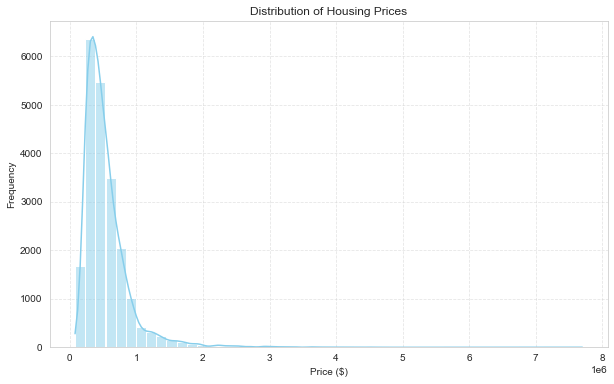

In [93]:

sns.set_style("whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot the distribution of housing prices with KDE
sns.histplot(kc_data_df['price'], bins=50, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Housing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


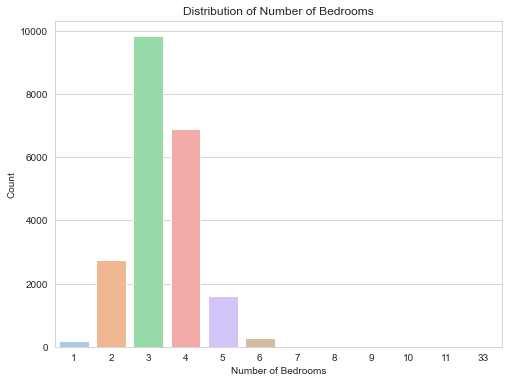

In [94]:
# Plot a bar plot of the number of bedrooms
plt.figure(figsize=(8, 6))
sns.countplot(x='bedrooms', data=kc_data_df, palette='pastel')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()


# Data Cleaning

At these stage we will clean our data using the following steps

* **Completeness** (we will check for missing values , how they affect our data set and how we will handle them)

* **Consistency** (we will check for duplicate values and how to handle them)

* **Uniformity** ( we will check the data types as well as our columns naming for uniformity)

* **Validity** (we will handlle irrelevant columns and  check for outliers )

#### Completeness

In [95]:
# checking and summing up our missing values in our data set
kc_data_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We seem to have missing values in our `waterfront`(2376),`view`(63) and `yr_renovated`(3842). We will have to investigate further.

In [96]:
# lets check for the percentage of missing values in our data set
for col in kc_data_df.columns: # we are using a for loop to iterate over our data
    if kc_data_df[col].isnull().sum() > 0:
        percentage = (kc_data_df[col].isnull().sum()/len(kc_data_df[col]))*100
        print("The column", col,"has",kc_data_df[col].isnull().sum(),"missing values, which is", round(percentage, 1),"% of it's total")

The column waterfront has 2376 missing values, which is 11.0 % of it's total
The column view has 63 missing values, which is 0.3 % of it's total
The column yr_renovated has 3842 missing values, which is 17.8 % of it's total


Lets further check each column with missing values

###### Waterfront column

Lets check for the value count of the unique elements

In [97]:
#checking for unique elements value count
print("The Waterfront Column\n")

print("Number of distinct elements is:", kc_data_df['waterfront'].nunique(),"\n")

print("This is the count of unique values:")
print(kc_data_df['waterfront'].value_counts(),"\n")

print('The unique values:')
print(kc_data_df['waterfront'].unique(),"\n")

print("Number of missing values:",kc_data_df['waterfront'].isnull().sum())

The Waterfront Column

Number of distinct elements is: 2 

This is the count of unique values:
NO     19075
YES      146
Name: waterfront, dtype: int64 

The unique values:
[nan 'NO' 'YES'] 

Number of missing values: 2376


The two unique values are YES and NO. NO is the most common value in this column with(19875) entries, whilst YES has just (146). This indicates that the majority of these homes lack a waterfront, hence it seems reasonable to presume that the homes with missing values  lack a waterfront. it is safe to substitute the missing values with NO

In [98]:
# replacing missing values with 'NO'
kc_data_df['waterfront'].fillna('NO',inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['waterfront'].value_counts())
print(kc_data_df['waterfront'].unique())

NO     21451
YES      146
Name: waterfront, dtype: int64
['NO' 'YES']


The change was successful because the number of NO entries increased from 19875 to 21451.

 ###### View column

Lets create a function to get our unique elements and sum up there value counts

In [99]:
def unique_counts(data, column): # creating a function for checking for unique elements and ther counts
    print("Number of distinct elements in", column, "column:", data[column].nunique())  # checking for unique elements in the column

    value_counts = data[column].value_counts()  # counting the value of each unique element

    # Use Series.apply with a Lambda Function
    format_lambda = lambda x: f"{x}: {value_counts[x]} ({value_counts[x] / len(data) * 100:.1f}%)"

    formatted_counts = value_counts.index.map(format_lambda)  # it will execute without creating the formatted_counts variable or printing its contents.
    print(formatted_counts)

    print(f"\nMissing values:", data[column].isnull().sum())  # combining the information


In [100]:
unique_counts(kc_data_df,'view')

Number of distinct elements in view column: 5
Index(['NONE: 19422 (89.9%)', 'AVERAGE: 957 (4.4%)', 'GOOD: 508 (2.4%)',
       'FAIR: 330 (1.5%)', 'EXCELLENT: 317 (1.5%)'],
      dtype='object')

Missing values: 63


In this column, NONE is the most frequent unique element. This indicates that the 63 missing values are representing homes  that don't have a view. Hence I WILL substitute  the missing values with NONE.

In [101]:
# replacing missing values with 'NONE'
kc_data_df['view'].fillna('NONE',inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['view'].value_counts())
print(kc_data_df['view'].unique())

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


Changes successfully made

###### Yr_renovated column

In [102]:
unique_counts(kc_data_df,'yr_renovated' )# using the unique_count function

Number of distinct elements in yr_renovated column: 70
Index(['0.0: 17011 (78.8%)', '2014.0: 73 (0.3%)', '2003.0: 31 (0.1%)',
       '2013.0: 31 (0.1%)', '2007.0: 30 (0.1%)', '2000.0: 29 (0.1%)',
       '2005.0: 29 (0.1%)', '1990.0: 22 (0.1%)', '2004.0: 22 (0.1%)',
       '2009.0: 21 (0.1%)', '1989.0: 20 (0.1%)', '2006.0: 20 (0.1%)',
       '2002.0: 17 (0.1%)', '1991.0: 16 (0.1%)', '1998.0: 16 (0.1%)',
       '1984.0: 16 (0.1%)', '1999.0: 15 (0.1%)', '2008.0: 15 (0.1%)',
       '2010.0: 15 (0.1%)', '2001.0: 15 (0.1%)', '1983.0: 15 (0.1%)',
       '2015.0: 14 (0.1%)', '1985.0: 14 (0.1%)', '1986.0: 14 (0.1%)',
       '1987.0: 14 (0.1%)', '1994.0: 14 (0.1%)', '1992.0: 13 (0.1%)',
       '1993.0: 12 (0.1%)', '1997.0: 12 (0.1%)', '1995.0: 12 (0.1%)',
       '1996.0: 11 (0.1%)', '1988.0: 11 (0.1%)', '1970.0: 9 (0.0%)',
       '2011.0: 9 (0.0%)', '1980.0: 8 (0.0%)', '1982.0: 8 (0.0%)',
       '2012.0: 8 (0.0%)', '1979.0: 7 (0.0%)', '1977.0: 7 (0.0%)',
       '1968.0: 7 (0.0%)', '1975.0: 5 (0.

 The years span from 1948–2014 and 0.0 is the most frequent value thus  we'll replace the missing values with 0.0 because we don't know what 0.0 means based  on this data.

In [103]:
# replacing missing values with '0.0'
kc_data_df['yr_renovated'].fillna(0.0,inplace=True)

# confirming if the missing values have been replaced
print(kc_data_df['yr_renovated'].value_counts())
print(kc_data_df['yr_renovated'].unique())

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64
[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


The changes are made successfully

In [104]:
# checking to see if there are any more missing values
kc_data_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values

  #### CONSISTENCY

In [105]:
# Checking for duplicate values
kc_data_df.duplicated().sum()

0

There are no duplicate values

#### UNIFORMITY

**Converting  Data Types of Values in Columns from Object to Float**

The sqft_basement values are in objects data type, given that this column has numeric values.  let's try to investigate  the reason why the datatype isn't a float or integer. 

In [106]:
kc_data_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2310.0        1
915.0         1
2490.0        1
906.0         1
2360.0        1
Name: sqft_basement, Length: 304, dtype: int64

 These values represented by "?" string can be regarded as null values. We  will replace the "?"  with 0.0, because the majority of the values are at 0.0.

In [107]:
# replacing the ? with 0.0
kc_data_df['sqft_basement'].replace('?','0.0',inplace=True)

#converting column to data type 'float'
kc_data_df['sqft_basement'] = kc_data_df['sqft_basement'].astype(float)

#confirming the change 
kc_data_df['sqft_basement'].dtype

dtype('float64')

We have successfully changed the data type to  a float

#### VALIDITY

##### Dropping unncecessary columns

In [108]:
if 'id' in kc_data_df.columns:
    kc_data_df = kc_data_df.drop(columns=['id'])

##### Outliers

In [109]:
#checking for outliers using intequatrile for each column

Q1 = kc_data_df.quantile(0.25) # First quartile
Q3 = kc_data_df.quantile(0.75) # Third quartile
IQR = Q3 - Q1

print(IQR)

price            323000.0000
bedrooms              1.0000
bathrooms             0.7500
sqft_living        1120.0000
sqft_lot           5645.0000
floors                1.0000
sqft_above         1020.0000
sqft_basement       550.0000
yr_built             46.0000
yr_renovated          0.0000
zipcode              85.0000
lat                   0.2069
long                  0.2030
sqft_living15       870.0000
sqft_lot15         4983.0000
dtype: float64


##### Visualising the outliers

We have the above outliers lets visualize them using boxplots to investigate further

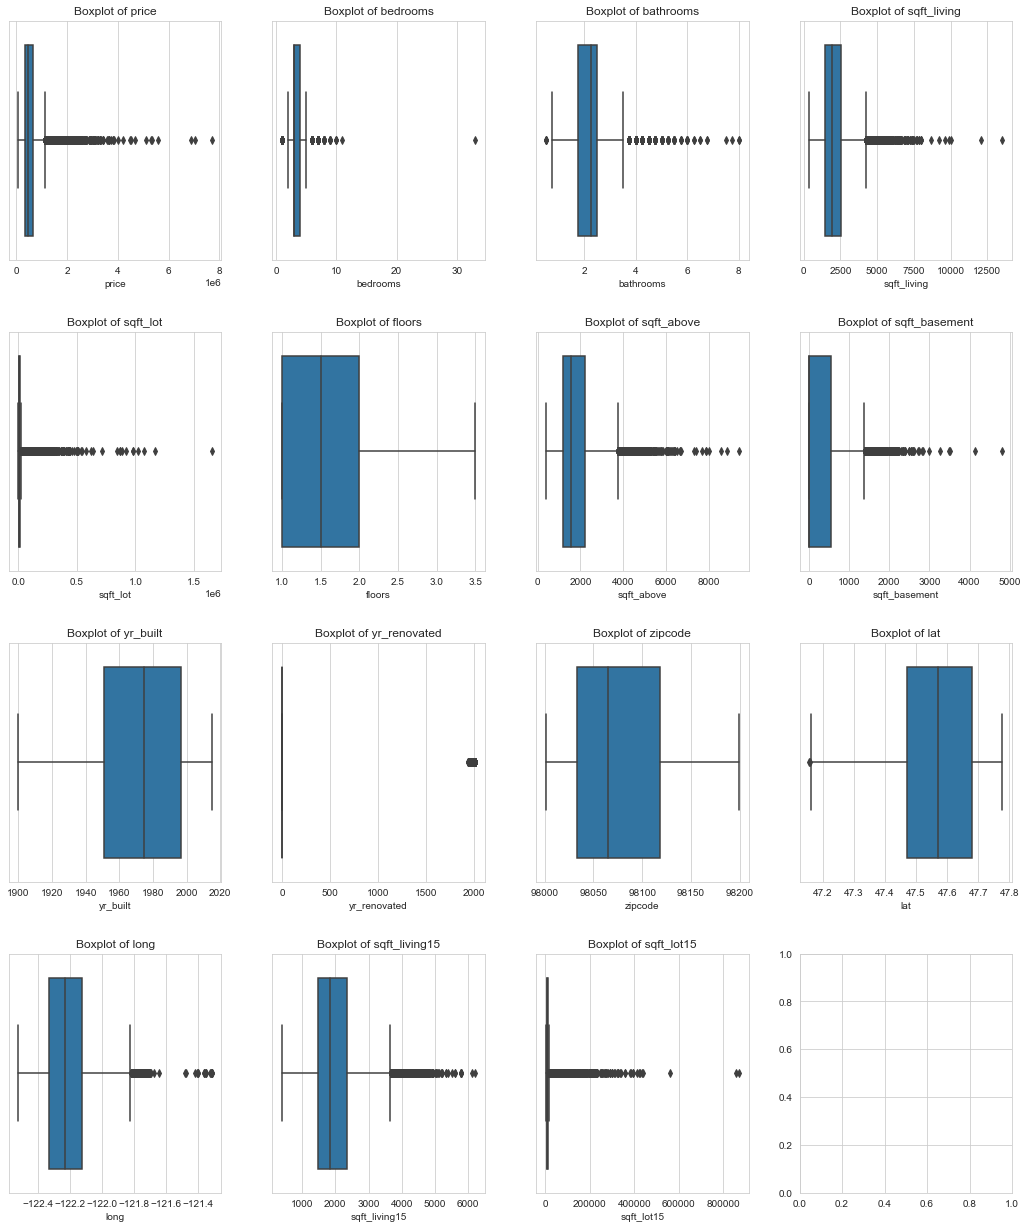

In [110]:
# Plotting box plots to visualize our outliers
# Creating a list of column names excluding non-numeric columns (if any)
numeric_columns = kc_data_df.select_dtypes(include=['number']).columns

# Seting up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 18))

# Iterating over each numeric column and create a boxplot
for num in range(len(numeric_columns)):
#     ax = axes[i] if len(numeric_columns) > 1 else axes  # If there's only one numeric column, axes is not a list
    
    # Designed Numeric Column
    column = numeric_columns[num]
    
    # Creating the boxplots
    sns.boxplot(x=kc_data_df[column], ax=axes[num//4, num%4])
    
    # Seting titles and labels
    axes[num//4, num%4].set_title(f'Boxplot of {column}')
    axes[num//4, num%4].set_xlabel(column)
    
    
plt.tight_layout(pad=3.0)  # Adjusting the spacing between subplots
plt.subplots_adjust(top=0.95)  # Adjusting the top margin to accommodate titles   


##### Observation
There are some outliers in our columns.

We should drop them.

In [111]:
# Removing the outliers 
# outliers_df_iqr = kc_data_df[~((kc_data_df < (Q1 - 1.5 * IQR)) |(kc_data_df > (Q3 + 1.5 * IQR))).any(axis=1)]

#print(outliers_df_iqr.shape) # The number of rows and columns in the new dataframe

#### Key point

After we began modelling we chose to undo the removing  of outlier since the removal of outliers really affected the performance of our models significantly e.g. where all houses with a `yr_renovated` column would be dropped.

### FEATURE ENGINEERING

#### Months and Years

The month and year the houses were sold are shown in the date column and data can be analysed easily by creating new columns called year and month  from this column.

In [112]:
# Spliting the date into month, day, and year
date_split = kc_data_df['date'].str.split('/', expand=True)

# Creating new columns for month and year and converting the values to integers
kc_data_df['month_sold'] = date_split[0].astype(int)
kc_data_df['year_sold'] = date_split[2].astype(int)

# Droping the original date column
kc_data_df.drop(columns=['date'], inplace=True)

# Verifying the changes
print("DataFrame after splitting date:")
kc_data_df.head()


DataFrame after splitting date:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


We can seen the two columns have been  created and added to our dataset

#### Age of properties

Lets create additional columns to determine the age of a house by getting the differnce between _2015_ (that's when the data was last recorded - the reference year) and `yr_built`; and another column describing the age of the house after renovation by also getting the difference between 2015 and `yr_renovated  `.

These new columns will help to determine whether the age of built or renovation has an impact on the price of the house.

In [113]:
# creating a new column 'age_built' showing the age of house since its was built upto 2015
kc_data_df['age_built'] = 2015 - kc_data_df['yr_built']

In [114]:
#creating a new column 'age_renovated' showing the age of a house after renovation
kc_data_df['age_renovated'] = (2015 - kc_data_df['yr_renovated']).apply(lambda x: 0 if x == 2015 else x)

In [115]:
# Test
kc_data_df.columns # checking to see if the two columns have been added

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age_built',
       'age_renovated'],
      dtype='object')

#### Seasons

Lets create a new column named  season_sold that tell us which at which season was a specific house sold at these will helps us to identify which season had the most sales and whether season determines the price of a house

In [116]:
# creating a season dictonary using months in numerical order
season_dict = {1:'Winter',
           2:'Winter',
           3:'Spring',
           4:'Spring',
           5:'Spring',
           6:'Summer',
           7:'Summer',
           8:'Summer',
           9:'Fall',
           10:'Fall',
           11:'Fall',
           12:'Winter'}
# creating a new column and mapping it to season_dict
kc_data_df['season_sold'] = kc_data_df['month_sold'].map(season_dict)

In [117]:
kc_data_df.head(5) # viewing the first five rows of our data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_built,age_renovated,season_sold
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,...,98178,47.5112,-122.257,1340,5650,10,2014,60,0.0,Fall
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,...,98125,47.7210,-122.319,1690,7639,12,2014,64,24.0,Winter
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,...,98028,47.7379,-122.233,2720,8062,2,2015,82,0.0,Winter
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,...,98136,47.5208,-122.393,1360,5000,12,2014,50,0.0,Winter
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,...,98074,47.6168,-122.045,1800,7503,2,2015,28,0.0,Winter


# Data Visualization

Before diving into the modeling phase, we will create visualizations to uncover trends within the dataset. 

The main focus was on visualizing price as the dependent variable, with `waterfront` and `condition` as the independent categorical variables. Additionally, we will explore `bedrooms`, `bathrooms`, `sq_living`, and `sqft_lot` as our independent numerical variables. 

These visualizations were essential in understanding the dynamics of the data and identifying key factors influencing property prices.

### Univariate Analysis

Understanding the distribution of our target feature `price`

In [118]:
# A function to create simple one feature histogram
def feature_histogram(feature, log_transform=False):
    plt.figure(figsize=(8, 6))
    if log_transform == True:
        feature_log = np.log(kc_data_df[feature])
        sns.histplot(data=kc_data_df, x=feature_log, kde=True)
    else:
        sns.histplot(data=kc_data_df, x=feature, kde=True)
    plt.title(f'{feature.capitalize()} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Price

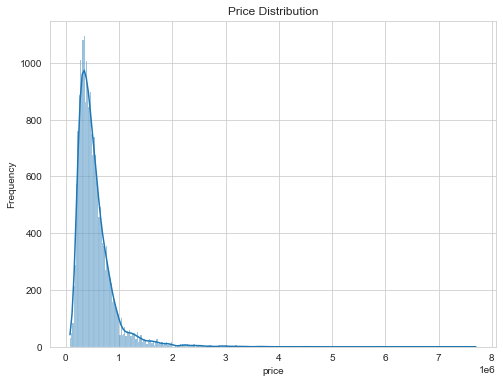

In [119]:
feature_histogram('price')

The histogram of 'price' reveals a positively skewed distribution, indicating that a significant number of properties have lower prices while fewer properties command higher prices. To address this skewness and achieve a more symmetrical distribution, we will do a log transformation.

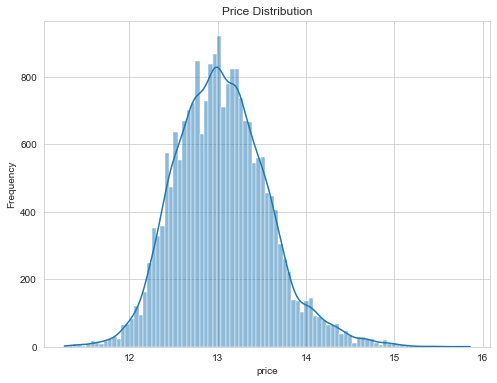

In [120]:
feature_histogram('price', log_transform=True)

#### Other Independent Variables

In [121]:
def plot_independent_vars(features_list, log_transform=False):
    if log_transform == True:
        # Create a figure and axes for the plots
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

        # Loop through each numeric variable and create a distplot
        for i, col in enumerate(features_list):

            log_values = np.log(kc_data_df[col])
            sns.histplot(data=log_values, ax=axes[i//2, i%2], bins=10, kde=True)
            axes[i//2, i%2].set_title(f'Distribution of {col} (Log Transformed)')    

        # Adjust layout
        plt.tight_layout()
        plt.show()
        
    else:
        # Create a figure and axes for the plots
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

        # Loop through each numeric variable and create a distplot
        for i, col in enumerate(features_list):
            
            sns.histplot(data=kc_data_df[col], ax=axes[i//2, i%2], bins=10, kde=True)
            axes[i//2, i%2].set_title(f'Distribution of {col}')

        # Adjust layout
        plt.tight_layout()
        plt.show()

#### Independent Features

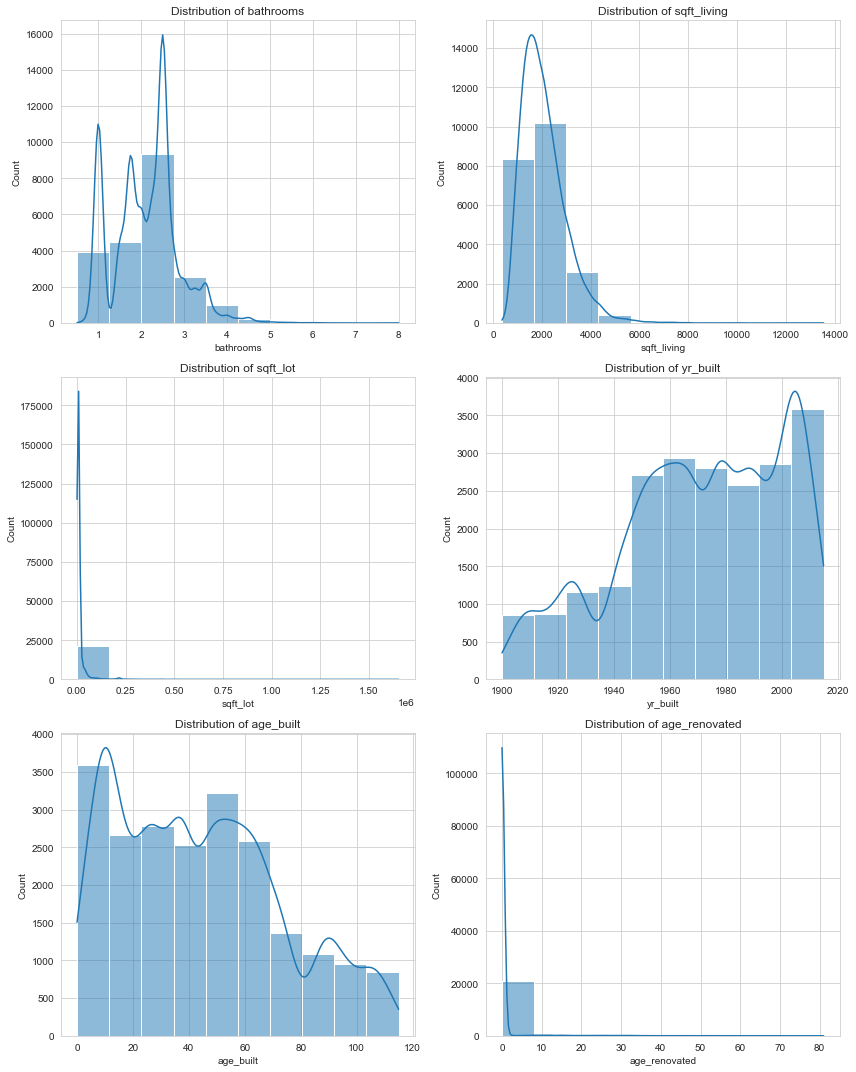

In [122]:
num = ['bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'age_built', 'age_renovated']

plot_independent_vars(num)

##### Comments

Nearly all variables, particularly `sqft_living`, `sqft_lot`, and `age_built`, exhibit positive skewness, we plan to apply log transformations to each variable to assess if the distributions become more normal.

#### Log Transformation og the independent variables

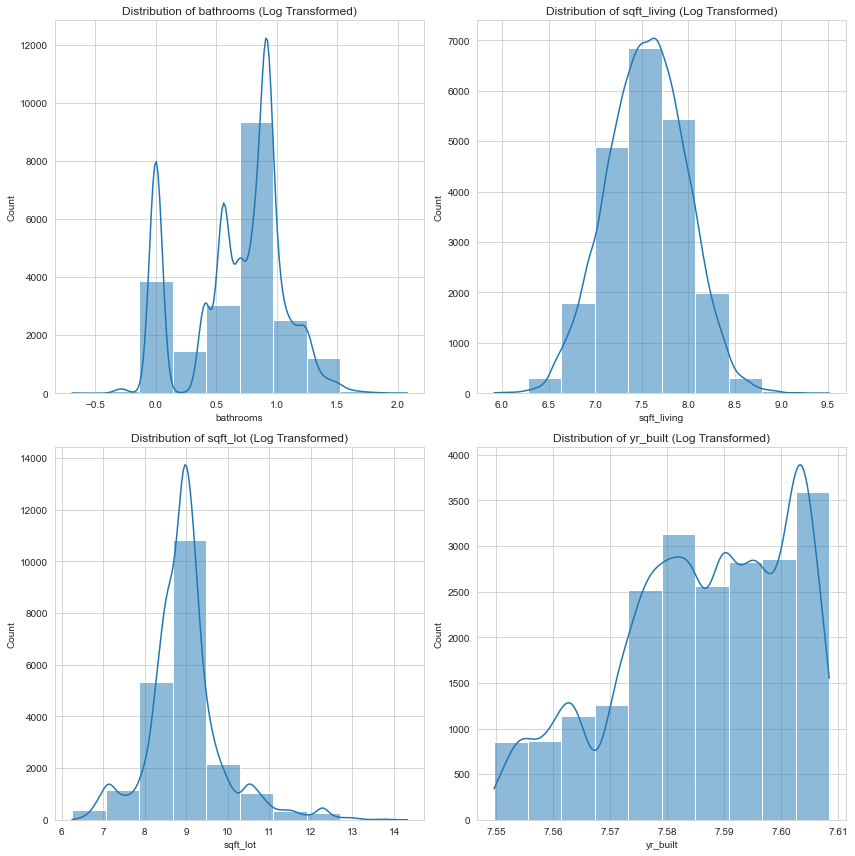

In [123]:
plot_independent_vars(num[:4], log_transform=True)

##### Comments

The log transformation will help stabilize the variance across different levels of the variables, making the relationships between variables more interpretable for the regression modelling.

### Bivariate Analysis 

Next we will be checking the relationship between price and the numeric independent variables that we will be using.

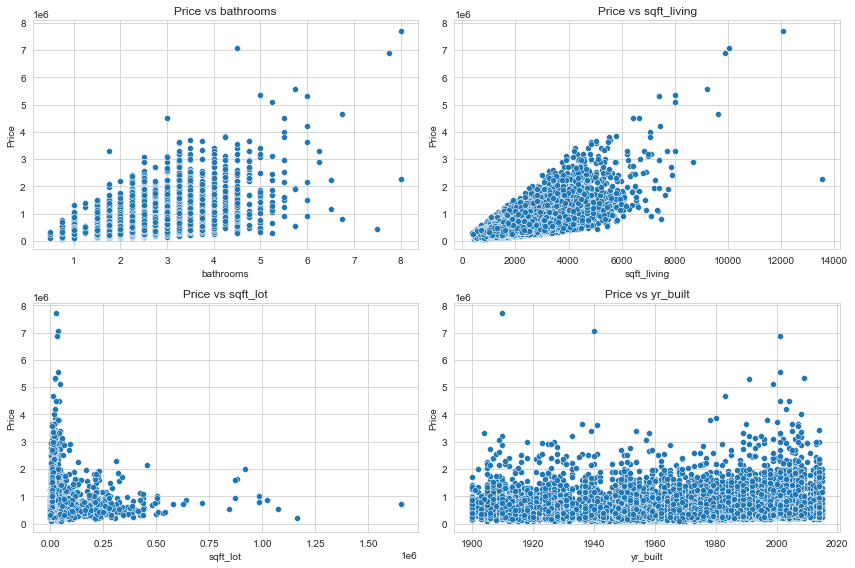

In [124]:
# bivariate analysis for the numerical independent variables
plt.figure(figsize=(12, 8))

for var in num[:4]:
    plt.subplot(2, 2, num.index(var) + 1)
    sns.scatterplot(x=var, y='price', data=kc_data_df)
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

Only bathrooms and sqft_living have a linear relationship with price 

### Categorical Variables

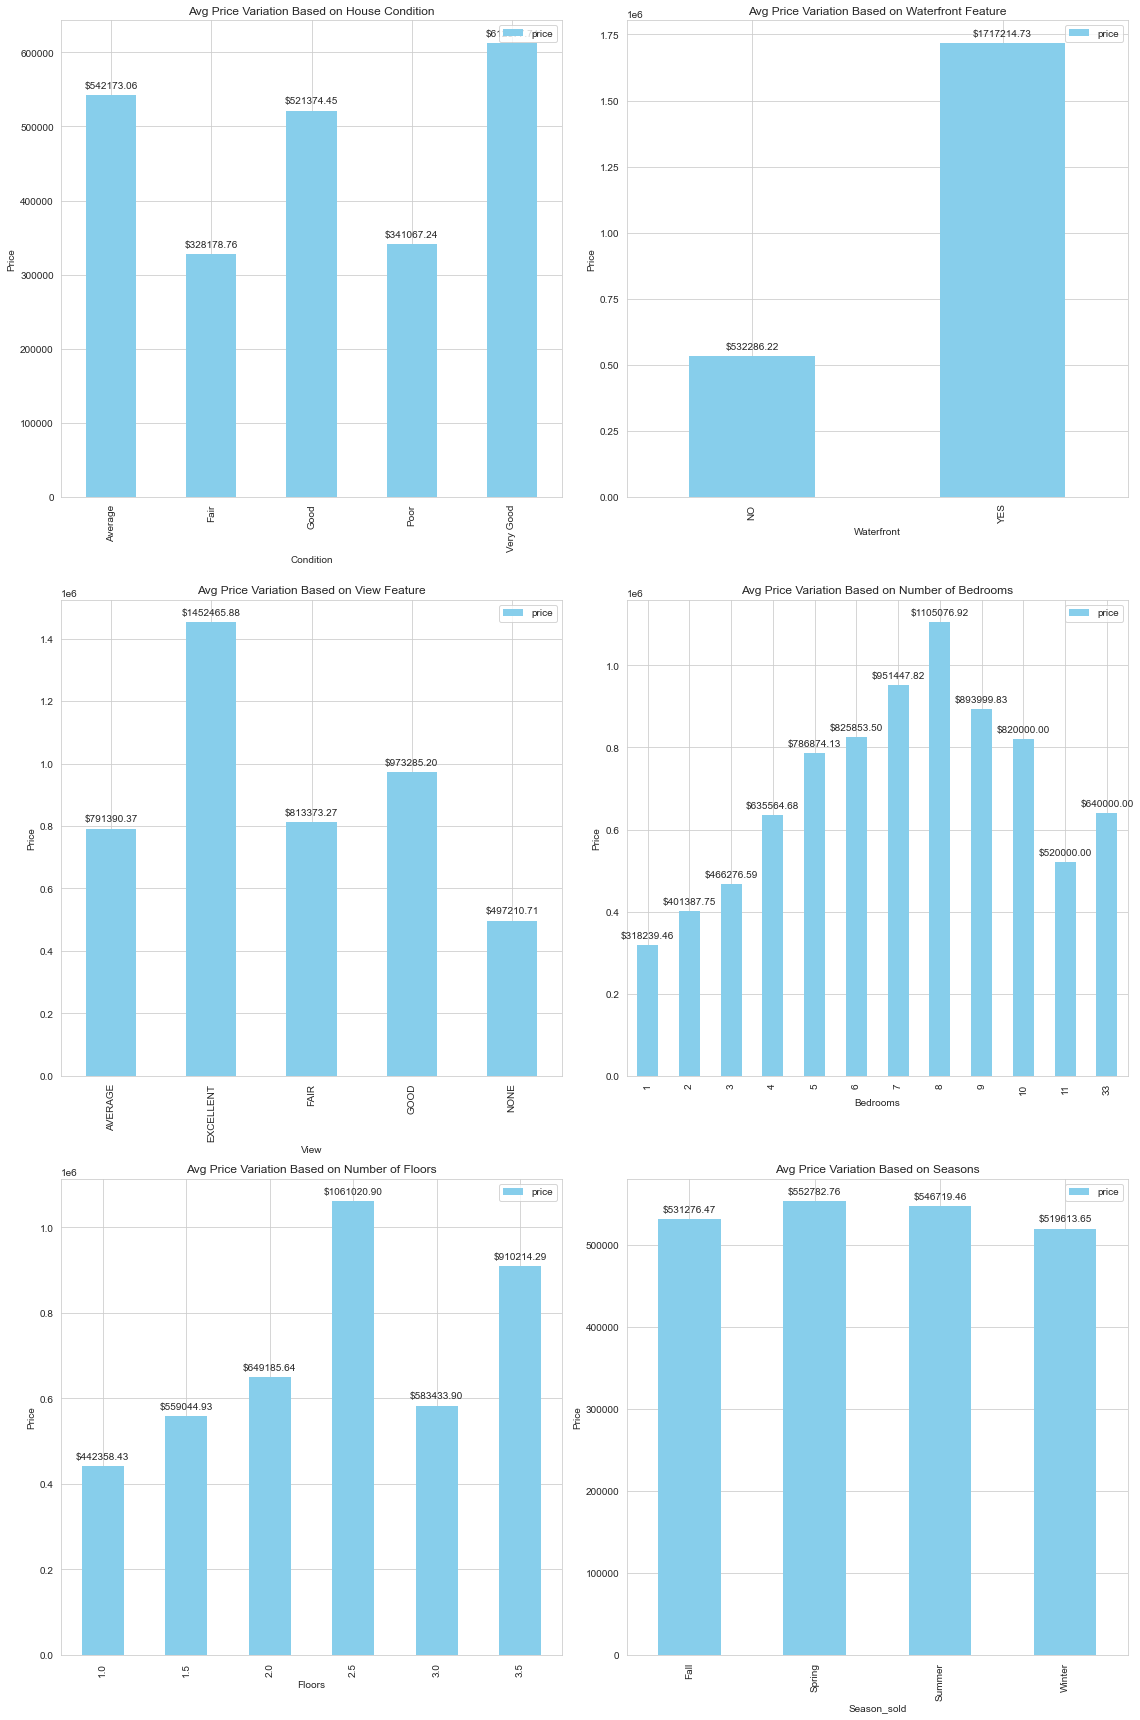

In [125]:
# Define the plots to be created
plots = [
    ('Avg Price Variation Based on House Condition', 'condition', 'Price'),
    ('Avg Price Variation Based on Waterfront Feature', 'waterfront', 'Price'),
    ('Avg Price Variation Based on View Feature', 'view', 'Price'),
    ('Avg Price Variation Based on Number of Bedrooms', 'bedrooms', 'Price'),
    ('Avg Price Variation Based on Number of Floors', 'floors', 'Price'),
    ('Avg Price Variation Based on Seasons', 'season_sold', 'Price')
]

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the plots and create bar plots for each
for i, (title, x_col, y_col) in enumerate(plots):
    # Calculate the average price for each group
    avg_prices = kc_data_df.groupby(x_col)['price'].mean()
    
    # Convert the series to a DataFrame for plotting
    avg_prices_df = avg_prices.reset_index()
    
    # Create a bar plot for the current plot using Pandas' plot function
    avg_prices_df.plot.bar(x=x_col, y='price', ax=axes[i], color='skyblue', edgecolor='none')
    
    # Set the title, x-axis label, and y-axis label for the current subplot
    axes[i].set_title(title)
    axes[i].set_xlabel(x_col.capitalize())
    axes[i].set_ylabel(y_col)
    
    # Add value labels on top of each bar
    for p in axes[i].patches:  # Loop for each patch (bar) in the current subplot axes[i]
        # Add an annotation to the current subplot
        axes[i].annotate(f"${p.get_height():.2f}",  # Format the annotation with two decimal places and a dollar sign
                         (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the annotation at the top center of each bar
                         ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')  # Annotation properties

# Adjust the layout of the subplots for better visualization
plt.tight_layout()
plt.show()

#### Heatmap

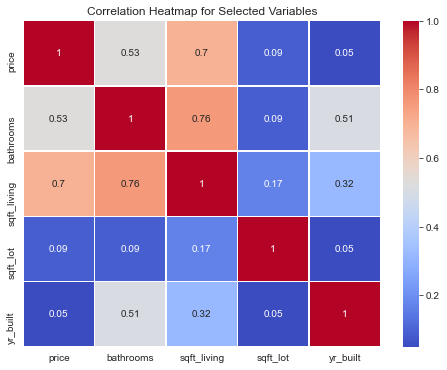

In [126]:
# Define the variables you want to include in the correlation matrix
selected_vars = ['price','bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']

# Compute correlation matrix for the selected variables
corr_matrix_selected = kc_data_df[selected_vars].corr()
rounded_corr_matrix_selected = np.round(corr_matrix_selected, 2)

# Plot the correlation heatmap for the selected variables
plt.figure(figsize=(8, 6))
sns.heatmap(rounded_corr_matrix_selected, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()


# Modelling

## Simple Linear Regression Modelling

### Preprocessing

Working with categorical data would hinder the modeling process.

A work-around to this hinderance is using **One Hot Encoding** that converts categorical data into numerical data.

In [127]:
def one_hot_encode(df):
    
    # Identify categorical columns (assuming they are of type 'object' or 'category')
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Perform one-hot encoding
    # `drop_first=True` can be used to drop the first level and avoid multicollinearity
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df_encoded

In [128]:
# 'encoding' of categorical features and a view of the 'encoded' dataframe
kc_data_encoded = one_hot_encode(kc_data_df)
kc_data_encoded

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,season_sold_Spring,season_sold_Summer,season_sold_Winter
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,...,0,0,0,0,1,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,0.0,...,0,0,0,1,0,0,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,...,0,0,0,0,1,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,...,0,0,0,0,0,1,0,1,0,0
21593,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,...,0,0,0,0,0,1,0,0,0,1
21594,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,...,0,0,0,0,1,0,0,0,1,0
21595,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,...,0,0,0,0,0,1,0,0,0,1


In [129]:
def visualize_and_evaluate_regression(x, y, variable_name):
    
    """
    This function performs simple linear regression between two parameters
    x needs to be a dataframe and y needs to be a series
    variable name is used to title the scatter plot.
    
    The method returns the scatter plot, MSE and the R^2
    """
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title(f'Scatter Plot of Price vs {variable_name}')
    plt.xlabel(f'Number of {variable_name}')
    plt.ylabel('Price')
    plt.grid(True)
    
    # Fit linear regression
    lr_model = LinearRegression()
    lr_model.fit(x, y)
    y_pred = lr_model.predict(x)
    
    # Plot regression line
    plt.plot(x, y_pred, color='red')
    plt.show()
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(x_test)
    
    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"{variable_name} coefficient:", round(model.coef_[0], 4))
    print("Mean Squared Error:", round(mse, 4))
    print("Root Mean Squared Error:", round(rmse, 4))
    print("Test R-squared:", round(r2, 4))

#### Simple Regression For Bathrooms 

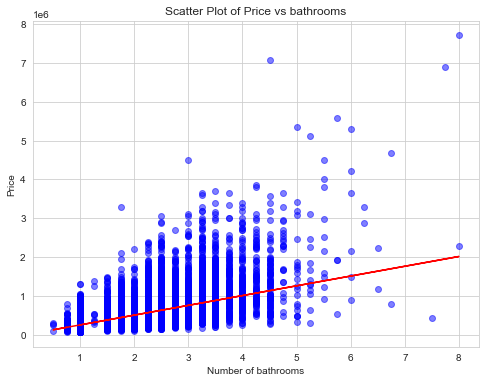

bathrooms coefficient: 254433.7979
Mean Squared Error: 96259973227.5506
Root Mean Squared Error: 310257.914
Test R-squared: 0.2608


In [130]:
x = kc_data_encoded[['bathrooms']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, variable_name='bathrooms')

##### Comment
R-squared value suggests that the number of bathrooms alone explains only a small portion of the variability in house prices, indicating that other factors likely play a significant role in determining house prices.
a high MSE, indicating that it may not be accurately predicting house prices.

#### Simple Regression for Bedrooms

Noting that we had already transformed the `bedrooms` feature into the categorical dtype, we reload to data to get the feature's original format (dtype integer).

Attempting to use the categorical dtype would lead to an error occuring.

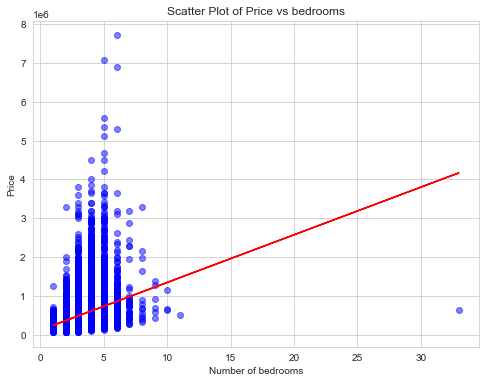

bedrooms coefficient: 128682.2909
Mean Squared Error: 120252618067.0721
Root Mean Squared Error: 346774.5926
Test R-squared: 0.0765


In [131]:
x = kc_data_encoded[['bedrooms']] # Independent variable
y = kc_data_encoded['price']
visualize_and_evaluate_regression(x, y, variable_name='bedrooms')

##### Comment
Since the MSE is quite high, it suggests that the model's predictions have a large variance from the actual prices
A low R-squared value suggests that the model does not explain much of the variability in the data and may not be providing meaningful insights or predictions.

#### Simple Regression for sqft_living

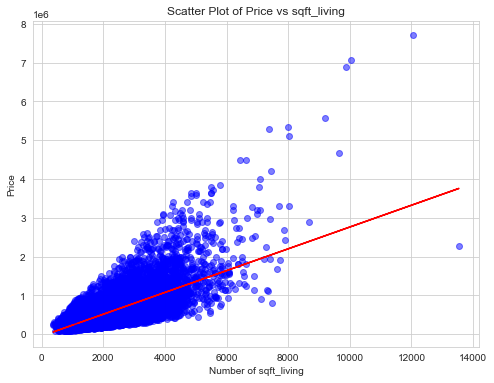

sqft_living coefficient: 282.2015
Mean Squared Error: 65977373783.6176
Root Mean Squared Error: 256860.6116
Test R-squared: 0.4933


In [132]:
x = kc_data_encoded[['sqft_living']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, variable_name='sqft_living')

##### Comment

The lower MSE and higher R-squared value indicate that the models predictions are more accurate, 
and sq living is a stronger predictor of house prices.

#### Simple Regression For sqft_lot

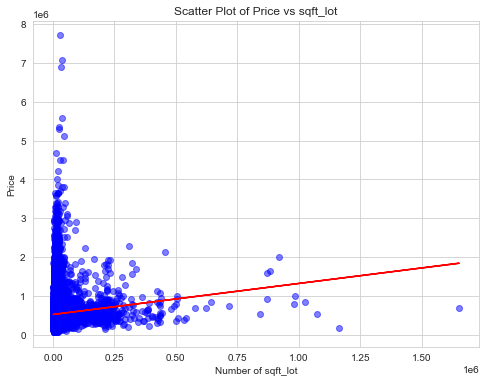

sqft_lot coefficient: 0.8217
Mean Squared Error: 129173354169.2444
Root Mean Squared Error: 359406.9479
Test R-squared: 0.008


In [133]:
x = kc_data_encoded[['sqft_lot']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, 'sqft_lot')

##### Comment
A very low R-squared value suggests that the model does not explain much of the variability
in the data and may not be providing meaningful insights or predictions.

#### Simple Regression For sqft_above

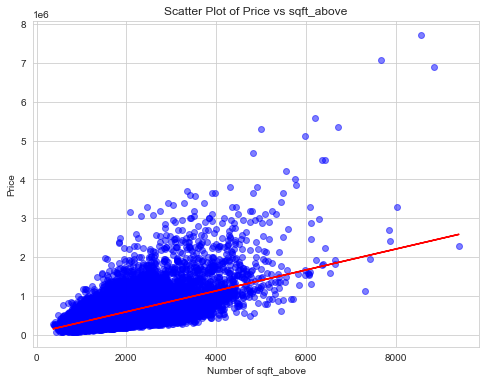

sqft_above coefficient: 269.3903
Mean Squared Error: 81009229868.7906
Root Mean Squared Error: 284621.2042
Test R-squared: 0.3779


In [134]:
x = kc_data_encoded[['sqft_above']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, 'sqft_above')

 ##### Comment
 The r-squared value only explains a moderate proportion of the variance in house prices(this can be used since it is higher than majority Variables analysed)
 MSE is still high thus indicating a high squared difference between houses.

#### Simple Regression For sqft_basement

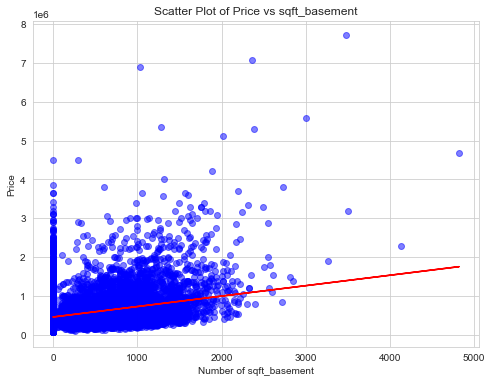

sqft_basement coefficient: 273.5959
Mean Squared Error: 119017421605.2412
Root Mean Squared Error: 344989.0166
Test R-squared: 0.086


In [135]:
x = kc_data_encoded[['sqft_basement']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, 'sqft_basement')

 ##### Comment
 The r-squared value is too low. We can not use it in the simple linear regression.

#### Simple Regression For sqft_living15

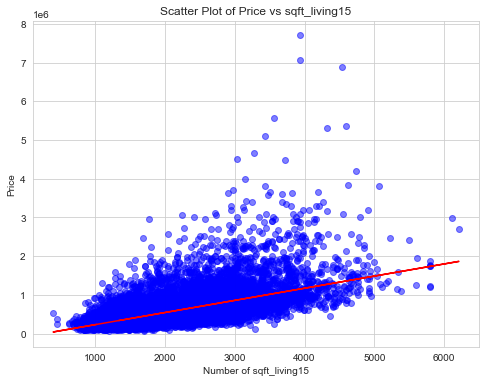

sqft_living15 coefficient: 317.7906
Mean Squared Error: 87839939165.492
Root Mean Squared Error: 296378.0342
Test R-squared: 0.3254


In [136]:
x = kc_data_encoded[['sqft_living15']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, 'sqft_living15')

##### Comment
A higher R2 value indicates that the model explains more variance and has better predictive power.
Lower MSE values suggest that the model's predictions are closer to the actual values, indicating better performance.

#### Simple Regression For sqft_lot15

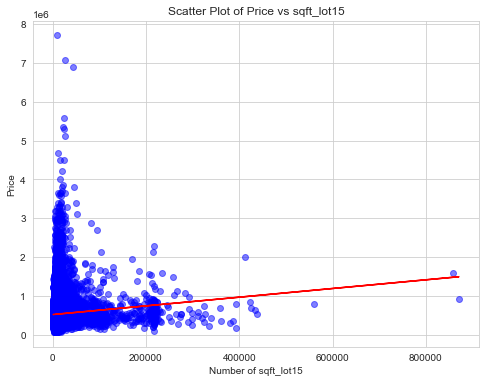

sqft_lot15 coefficient: 1.075
Mean Squared Error: 129004494109.0424
Root Mean Squared Error: 359171.9562
Test R-squared: 0.0093


In [137]:
x = kc_data_encoded[['sqft_lot15']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, 'sqft_lot15')

##### Comment
R-squared (R2) suggests that the model has limited ability to predict the variability in the dependent
variable using the included independent variablesR2 is too low 

#### Recommendation:
Our analysis underscores the crucial role of square footage in determining house prices:

`sqft_living`: Each additional square foot in the living area is associated with a substantial increase in house price, with a coefficient of 282.2015.

`Sqft_above`: The above-ground square footage positively influences house prices, with a coefficient of 269.3903, albeit with slightly lower impact compared to living area square footage.

`sqft_basement`: While positively correlated with house prices, the impact of basement square footage is relatively lower, with a coefficient of 273.5959.

These insights highlight the significance of property size in driving house values, providing valuable guidance to the real estate developer in making informed decisions regarding property investments and renovations

We conclude that `sqft_living,sqft_above` and `bathrooms` should be examined further in multiple regression since they have high `r-squared` in the non-categorical data analysed using simple linear regression.

### Multi-Linear Regression Modelling

In [138]:
#Function for modelling
# The function takes in a the encoded dataframe from the step above, creates a model, trains , tests and scores the models perfomance
def multi_linear_model(df, summary=True, scores=True, test_size=0.25):
    #Build linear regression model, return model and print model summary from statsmodels.
    #Create feature and target columns
    X = df.drop(columns=['price'], axis=1)
    y = df['price']
    
    #Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    #Fit the model
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
        
    #View model accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Print test and training scores
    if scores==True:
        print("Train-test split of: " + str((1-test_size) * 100) + "%-" + str(test_size * 100) + "%")
        print('Training Score:', round(train_score * 100, 2),'%')
        print('Test Score:', round(test_score * 100, 2), '%')
    
    #View model summary in statsmodels
    X_train = sm.add_constant(X_train)
    sm_model = sm.OLS(y_train, X_train).fit()
    
    # Print the model summary
    if summary==True:
        print(sm_model.summary())
        
    return sm_model

### Model Optimisation

#### Train-Test Split Selection

In [139]:
for test_size in [0.1, 0.15, 0.2, 0.25, 0.3]:
    multi_linear_model(kc_data_encoded, summary=False, scores=True, test_size=test_size)
    print("")

Train-test split of: 90.0%-10.0%
Training Score: 73.78 %
Test Score: 69.31 %

Train-test split of: 85.0%-15.0%
Training Score: 73.79 %
Test Score: 70.8 %

Train-test split of: 80.0%-20.0%
Training Score: 74.01 %
Test Score: 70.68 %

Train-test split of: 75.0%-25.0%
Training Score: 74.03 %
Test Score: 71.42 %

Train-test split of: 70.0%-30.0%
Training Score: 74.27 %
Test Score: 71.0 %



##### Recommendations
Following the analysis of the various train-test splits, we would recommend using the 75-25 split to optimise our models.

#### Multicollinearity Check

In [140]:
#Calculating the VIF values
X = kc_data_encoded.drop(columns=['price'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data

VIF_df = calculate_vif(X)
VIF_df

,feature,VIF
0,bedrooms,1.726082e+00
1,bathrooms,3.406454e+00
2,sqft_living,1.470025e+02
3,sqft_lot,2.107499e+00
4,floors,2.086720e+00
5,sqft_above,1.196966e+02
6,sqft_basement,3.311992e+01
7,yr_built,8.210813e+07
8,yr_renovated,2.567316e+00
9,zipcode,1.684102e+00


##### Dropping the multicolinear features

In [141]:
kc_data_encoded = kc_data_encoded.drop(columns=VIF_df[VIF_df['VIF']>10]['feature'].values)
multi_linear_model(test_df, summary=False)

Train-test split of: 75.0%-25.0%
Training Score: 70.56 %
Test Score: 67.04 %


#### Recommendations from the multicollinearity check
If between 5 and 10 is good, under 5 is very good. Anything under 10 we keep and drop anything above 10.

Dropping the features that have a strong multicollinearity factor, the R-squared value drops highlighting that the model could have been overfitted.

We will therefore use this new dataset without the multicollinear variables.

### Model Implementation

In [142]:
model_1 = multi_linear_model(kc_data_encoded)

Train-test split of: 75.0%-25.0%
Training Score: 70.56 %
Test Score: 67.04 %
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1107.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        17:48:15   Log-Likelihood:            -2.2058e+05
No. Observations:               16197   AIC:                         4.412e+05
Df Residuals:                   16161   BIC:                         4.415e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

# Model Evaluation # CONSTANTLY AFFECTED BY CHANGES - TO DO

#### Model Performance

The R-squared value (0.706) indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, about 70.6% of the variance in the price can be explained by the independent variables.

The F-statistic tests the overall significance of the model. A low p-value (below 0.05) suggests that the model is statistically significant, meaning at least one independent variable has a non-zero coefficient. The associated p-value (0.00) indicates that the model is statistically significant

The p-value associated with each coefficient indicates the statistical significance of that feature. A low p-value (typically < 0.05) suggests that the feature is statistically significant in predicting the target variable.

For instance, a low p-value for sqft_living indicates that it is statistically significant in predicting the house price.

**Mean Absolute Error** (MAE) measures the average magnitude of errors in a set of predictions, without considering their direction. It is calculated by taking the average of the absolute differences between the predicted values and the actual values.

**Root Mean Squared Error** (RMSE) is similar to MAE but gives more weight to large errors. It calculates the square root of the average of the squared differences between the predicted values and the actual values.

Lower MAE indicates better model performance, signifying that the predictions are, on average, closer to the true values.

In [143]:
# Split the dataset into training and test sets
train_data, test_data = train_test_split(kc_data_encoded, test_size=0.2, random_state=42)

# Extract the true values for training set
y_true_train = train_data['price'].values

# Extract the true values for test set
y_true_test = test_data['price'].values

# Display the extracted true values
print("True values for training set:", y_true_train)
print("True values for test set:", y_true_test)


True values for training set: [332500. 390000. 800000. ... 299800. 245000. 545000.]
True values for test set: [132500. 415000. 494000. ... 437000. 293000. 293467.]


In [144]:
X = kc_data_encoded.drop(columns=['price'])  
y = kc_data_encoded['price']

# Actual values
y_train_actual = y_true_train.tolist()  # Convert y_true_train to a list
y_test_actual = y_true_test.tolist()    # Convert y_true_test to a list



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predicted values
y_train_predicted = model.predict(X_train)  # Predicted values for the training data
y_test_predicted = model.predict(X_test)    # Predicted values for the test data


# Ensure that they have the same number of samples
y_train_actual = y_train_actual[:len(y_train_predicted)]
y_test_actual = y_test_actual[:len(y_test_predicted)]


# Calculate MAE and RMSE for training data
train_mae = mean_absolute_error(y_train_actual, y_train_predicted)
train_rmse = np.sqrt(mean_absolute_error(y_train_actual, y_train_predicted))


# Calculate MAE and RMSE for test data
test_mae = mean_absolute_error(y_test_actual, y_test_predicted)
test_rmse = np.sqrt(mean_absolute_error(y_test_actual, y_test_predicted))

print("Training MAE:", round(train_mae, 3))
print("Training RMSE:", round(train_rmse, 3))
print("Test MAE:", round(test_mae, 3))
print("Test RMSE:", round(test_rmse, 3))


Training MAE: 126105.592
Training RMSE: 355.113
Test MAE: 127601.488
Test RMSE: 357.214


#### Observation

The test MAE and RMSE are slightly higher than the training values. This could be an indication of overfitting which happens when a model memorizes the training data too well and fails to generalize well to unseen data.

However, in this case, the difference between the training and test errors is relatively small. So, it might not be a significant concern.

A well-performing model should have lower errors (MAE and RMSE) on the test set compared to the training set. This indicates that the model has learned the underlying patterns from the training data and can generalize well to unseen data in the test set.

>The test set MAE and RMSE (**127601.488 and 357.214**) are slightly higher than the training set values (**126105.592 and 355.113**), respectively. This suggests that the model might be overfitting the training data. While the model performs well on the training data it has seen, it generalizes less accurately to unseen data in the test set.

Lower values of MAE and RMSE indicate better predictive performance, suggesting that the model is better at predicting house prices.

**Coefficient Interpretation** 

The coefficients represent the change in the target variable for a one-unit change in the corresponding predictor variable, holding all other predictors constant.Each coefficient represents the change in the target variable (price) for a one-unit change in the corresponding independent variable, holding all other variables constant.

> *Variables with positive coefficients indicate that as they increase, the price tends to increase as well.*

> *Variables with negative coefficients suggest that as they increase, the price tends to decrease.*

For example, the coefficient for `sqft_living` is 97.81 . This means that for every additional square foot of living space, the price of the house is estimated to increase by $97.81, holding all other factors constant.

The coefficient for `bathrooms` is 43,650, indicating that, on average, each additional bathroom is associated with an increase in price of $43,650, holding all other factors constant.

The coefficient for `waterfront_YES` is 547,600, suggesting that houses with a waterfront view have a significantly higher price, with an average increase of $547,600 compared to houses without a waterfront view.

`bathrooms`: A positive coefficient (44,720) suggests that houses with more bathrooms tend to be more expensive, which is intuitive.

`sqft_living`: A positive coefficient (89.76) indicates a positive relationship between house price and living area.

`yr_built`: The negative coefficient (-41,190) suggests that older houses tend to be cheaper, all other factors being equal.


### Experimental Recursive Feature Elimination

We attempt to understand the effect of dropping a feature at a time on the model performance to gauge it's significance.

We will first drop the unnecessary column `id`.

In [145]:
def drop_column_preprocess_and_model(df, target_column, encoding_function):
    """
    Drops one column at a time from the DataFrame (excluding the target column), preprocesses the data with an encoder function,
    and creates a linear regression model based on the processed data. Returns a new DataFrame with two columns: the dropped column
    name and the corresponding R-squared value from the model created.
    
    Parameters:
    - df: DataFrame containing the original data
    - target_column: Name of the target column
    - encoding_function: Function for encoding categorical variables
    - linear_model: Function for creating the linear regression model
    
    Returns:
    - result_df: DataFrame containing two columns: 'Dropped_Column' and 'R-squared'
    """
    result_data = []  # List to store data for the new DataFrame
    
    for col in df.columns:
        if col != target_column:
            # Create a new DataFrame without the current column
            df_dropped = df.drop(columns=[col])
            
            # Preprocess the data with the encoder function
            df_encoded = encoding_function(df_dropped)
            
            # Create the linear regression model based on the processed data
            model = multi_linear_model(df_encoded, summary=False, scores=False)
            
            # Calculate R-squared value
            X = df_encoded.drop(columns=[target_column])
            y = df_encoded[target_column]
            r_squared = model.rsquared
            
            # Append data to the result list
            result_data.append({'Dropped_Column': col, 'R-squared': r_squared})
    
    # Create a DataFrame from the result list
    result_df = pd.DataFrame(result_data)
    
    return result_df

In [146]:
drop_column_preprocess_and_model(kc_data_new, 'price', one_hot_encode)

NameError: name 'kc_data_new' is not defined

### Comments on the Recursive Feature Elimination Experiment

Analysing the R-squared values from the recursive feature elimination experiment on our model has some interesting revelations on how each feature contributes to the predictive power of the model. Below are some of the observations:

1. Minor Variations in R-squared: 

The R-squared values for most features are very close to each other, generally around 0.84, which suggests that no single feature among these dominates the explanation of variance in the target variable (House price). Most features seem to contribute somewhat equally to the model's performance.

2. Significant Features:

Waterfront and View: Dropping waterfront and view leads to noticeably lower R-squared values (0.833162 and 0.834617 respectively), which suggests these features are more significant predictors of the target variable compared to others. Their absence weakens the model more than the absence of most other variables.

3. Grade: 

The drop in R-squared to 0.807129 when grade is omitted also indicates its strong predictive power and importance in the model. This drop is more pronounced than for most other features, highlighting grade as a key determinant of house price.

4. Zipcode: 

The significant drop to 0.737290 when zipcode is removed suggests that geographical location represented by zip codes is key for predicting house prices.

5. Stability Across Most Features: 

The stability of the R-squared value when features like sqft_living, sqft_above, sqft_basement, yr_built, and lat are dropped individually implies that these features, while individually significant, may have overlapping information with other features. This suggests possible multicollinearity or that these features share mutual information with other features in the King County dataset.

6. General Observations:

The model does not depend excessively on any single feature (except perhaps grade and zipcode), which is good for reliability.


## Conclusion

Our analysis has clarified several important points about the King County real estate market. At first, our observations showed that the pricing data was significantly biased, with several outliers distorting the general picture. Despite this, the area's average & median prices indicate that housing is generally within the reach of middle-class families; however, there is a noticeable difference between the average cost and the highest price at which homes can be sold. With this modification, we hope to depict better the housing options available to middle-income purchasers, who comprise the bulk of our target audience.

Additionally, our research highlighted several noteworthy correlations between pricing and other numerical independent variables. The number of bedrooms, baths, living area square footage, waterfront access, view quality, and other features showed strong relationships with home values. Notably, homes with better condition ratings, access to the waterfront, outstanding vistas, and more bedrooms tended to fetch higher prices on the market. Furthermore, our investigation on multicollinearity demonstrated how crucial it is to consider several variables at once when evaluating housing costs. While some features—like living space square footage—exhibited a high positive link with price, other features—like floors, bathrooms, and bedrooms—showed lesser correlations. All things considered, our study offers insightful information that will benefit King County real estate agents and prospective purchasers alike. It gives a detailed grasp of the variables affecting housing costs and helps make better decisions for everyone involved in the local real estate market.

## Recommendations:

**1. Constant Monitoring:** Both the age of the property and any renovations should be carefully evaluated. Buyers should inquire about the age of key components such as the roof, system, and appliances. Sellers should consider investing in renovations to increase the value of their property.

**2. Focus on Key Features:** Buyers and sellers should pay attention to key features such as waterfront views, property condition, and grade when assessing house prices. These features have significant impacts on the value of the property.

**3. Consider number of floors:** By analyzing the relationship between the number of floors and sale prices comprehensively, we can see an upwards trend from the 2.5 mark.

**4. Seasonal Trends and Optimal** Consider purchasing a house during winter. With the lowest average house price compared to other seasons, winter presents an opportunity to potentially find a more affordable home. While spring and summer may be popular seasons for buying, exploring the market during winter could result in cost savings. Additionally, with fewer buyers in the market during winter, there may be less competition for available properties. However, ensure to thoroughly assess any seasonal challenges, such as weather conditions, and work closely with a real estate professional to navigate the market effectively.


### Final Steps
1. Further Exploration of Outliers: Despite the fact that we tackled outliers via normalizing the data, we hypothesized that a deeper assessment of these outliers may reveal any specific market dynamics or extraordinary features of the property that ought to be taken into account.

2. Feature Engineering: To better deal with the subtleties of the housing market, find out what it would take to develop new features or integrate current features. Square footage may be a more reliable and consistent hint we can use along with other factors like lot size or facility accessibility when determining home prices.

3. Market Segmentation: In order to make marketing campaigns and product offerings match with a specific customer group, these groups are created using demographic features such as family size or income level. That might lead to the better used resources and better serving buyers of different segments.

4. Predictive Modelling: Utilize machine learning techniques and build prediction models to estimate house values based on various indicators. That then allows real estate companies to price properties based on the data and supply clients with very accurate price forecasts.


### Summary
The major aim of the project was to examine the residential real-estate market of King County with a focus on prices and the derivatives of the housing market variables. The pricing data was developed to be normalized in order to provide purchasing power for middle class buyers with an earlier observation showing a clear bias and anomalies in pricing listings. During the research there have been number of relationships formed; some of which are positive linear relationships with some characteristics like the number of bedrooms, number of bathrooms, size of living rooms, the proximity to a lake and the quality of the view. I came to know that multicollinearity analysis is a necessity when looking at the prices of the property through the use of different variables. Herewith, the research done provides the much needed information to help agents of real estate and homeowners in King County make more intelligent decisions by having a broader and wider understanding of the elements that always affect house prices. The proposal aims at boosting the process of analyzing the market and standardizing the methods of promotion and pricing the property in the area.